- (c) Ken-ichi Fukui, 2020/01/17
- MIT License

# パッケージの読み込み

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# データの読み込み

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# .data, .targetでそれぞれ各データの特徴ベクトル，クラスが取得できる
X = iris.data
y = iris.target
# jupyter notebookでは最後の行に変数名を書くと中身が表示される
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

# PCAで2次元に圧縮して散布図をプロット

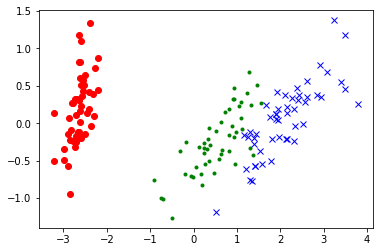

In [4]:
# PCAクラスのインスタンスを生成，主成分数は2に設定
pca = PCA(n_components=2)
# 主成分分析を実行し，主成分軸方向に射影
X2 = pca.fit_transform(X)

# X2[y==0,0]はX2のクラスラベルyが0に対応する行を抜き出し，その0列目を参照している
# "ro"は赤色の丸を指定している
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g.")
plt.plot(X2[y==2,0], X2[y==2,1],"bx")

# 前処理

In [5]:
# z標準化
X_scaled = preprocessing.scale(X)
# 平均と標準偏差を確認，axis=0は列単位を指定している
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15]),
 array([1., 1., 1., 1.]))

# 学習器のインスタンス生成

In [6]:
# K近傍法のインスタンスを生成，近傍数は2に設定
clf = KNeighborsClassifier(n_neighbors=2)
clf

KNeighborsClassifier(n_neighbors=2)

# クロスバリデーションで評価

In [7]:
# cross_val_scoreは学習・テストデータの分割から評価までまとめて行ってくれる
scores = cross_val_score(clf, X_scaled, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.13)


# 混同行列の表示

In [8]:
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]])